In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
import tensorflow as tf

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 4)

## Illustrate Linear Regression

In [4]:
X = np.arange(0.0, 5.0, 0.1)
W = 1.8 # slope or coefficient or gradient
b = 0.4 # intercept
y = W * X + b

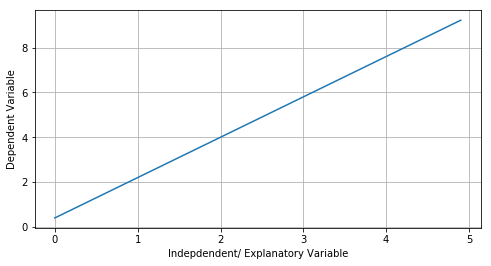

In [5]:
plt.plot(X, y)
plt.xlabel('Indepdendent/ Explanatory Variable')
plt.ylabel('Dependent Variable')
plt.grid(True)
plt.show()

## Load Datasets

In [6]:
df_fuel = pd.read_csv('./datasets/FuelConsumption.csv')
df_fuel.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
X_train = np.asanyarray(df_fuel[['ENGINESIZE']])
y_train = np.asanyarray(df_fuel[['CO2EMISSIONS']])

In [8]:
W = tf.Variable(20.0) # random guess
b = tf.Variable(30.2)
y = W * X_train + b

## Set Loss Function

In [9]:
loss_op = tf.reduce_mean(tf.square(y - y_train))

## Set Optimizer

In [10]:
optimizer_op = tf.train.GradientDescentOptimizer(learning_rate=0.05, name='GradientDescent').minimize(loss)

## Train The Graph

In [11]:
init_op = tf.global_variables_initializer()

In [12]:
with tf.Session() as sess:
    sess.run(init_op) # initialize the variables before executing a graph
    
    loss_values = []
    train_data = []
    num_epochs = 100

    for i_epoch in range(1, num_epochs+1):

        _, loss_val, w_val, b_val = sess.run([optimizer_op, loss_op, W, b])
        loss_values.append(loss_val)

        if i_epoch % 5 == 0:
            print(f'Epoch: {i_epoch}, Loss: {loss_val:.6f}, W Val: {w_val:.6f}, B Val: {b_val:.6f}')
            train_data.append([w_val, b_val])

Epoch: 5, Loss: 1934.492676, W Val: 59.763779, B Val: 46.635117
Epoch: 10, Loss: 1786.495728, W Val: 57.911816, B Val: 51.973316
Epoch: 15, Loss: 1674.181641, W Val: 56.615788, B Val: 57.051537
Epoch: 20, Loss: 1576.883301, W Val: 55.404785, B Val: 61.776962
Epoch: 25, Loss: 1492.591675, W Val: 54.277672, B Val: 66.175232
Epoch: 30, Loss: 1419.567505, W Val: 53.228600, B Val: 70.268997
Epoch: 35, Loss: 1356.305298, W Val: 52.252155, B Val: 74.079330
Epoch: 40, Loss: 1301.499268, W Val: 51.343319, B Val: 77.625847
Epoch: 45, Loss: 1254.019775, W Val: 50.497406, B Val: 80.926826
Epoch: 50, Loss: 1212.886841, W Val: 49.710052, B Val: 83.999275
Epoch: 55, Loss: 1177.252686, W Val: 48.977211, B Val: 86.859009
Epoch: 60, Loss: 1146.381836, W Val: 48.295113, B Val: 89.520737
Epoch: 65, Loss: 1119.637451, W Val: 47.660236, B Val: 91.998177
Epoch: 70, Loss: 1096.468262, W Val: 47.069317, B Val: 94.304100
Epoch: 75, Loss: 1076.396362, W Val: 46.519310, B Val: 96.450371
Epoch: 80, Loss: 1059.0075

## Plot Loss

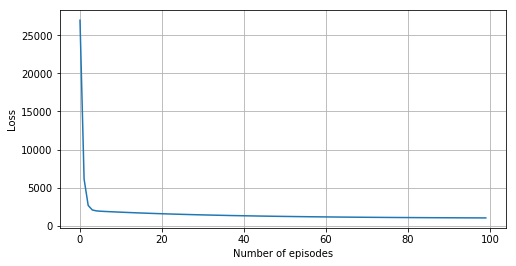

In [13]:
plt.plot(loss_values)
plt.xlabel('Number of episodes')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

## Show Linear Model

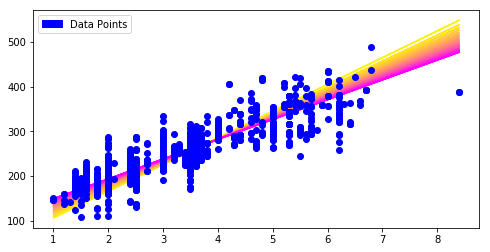

In [14]:
# visualize how the coefficient and intercept of line has changed to fit the data

cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(X_train)
    line = plt.plot(X_train, f_y)
    plt.setp(line, color=(cr,cg,cb))
    
plt.plot(X_train, y_train, 'ro', color='blue')

green_line = mpatches.Patch(color='blue', label='Data Points')

plt.legend(handles=[green_line])

plt.show()

---